In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.stats.api as sms
from scipy import stats
from sklearn import metrics
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score as cvs
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv(r'C:\data set\air passenger 1\train.csv',index_col="Unnamed: 0")

In [3]:
df_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df_test=pd.read_csv(r'C:\data set\air passenger\test.csv',index_col='Unnamed: 0')

In [5]:
df_test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [6]:
df_train.describe().round(1)

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103594.0
mean,64924.2,39.4,1189.4,2.7,3.1,2.8,3.0,3.2,3.3,3.4,3.4,3.4,3.4,3.6,3.3,3.6,3.3,14.8,15.2
std,37463.8,15.1,997.1,1.3,1.5,1.4,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.2,1.3,1.2,1.3,38.2,38.7
min,1.0,7.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,32533.8,27.0,414.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0
50%,64856.5,40.0,843.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,0.0,0.0
75%,97368.2,51.0,1743.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,12.0,13.0
max,129880.0,85.0,4983.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1592.0,1584.0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [8]:
df_train.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [9]:
df_test.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

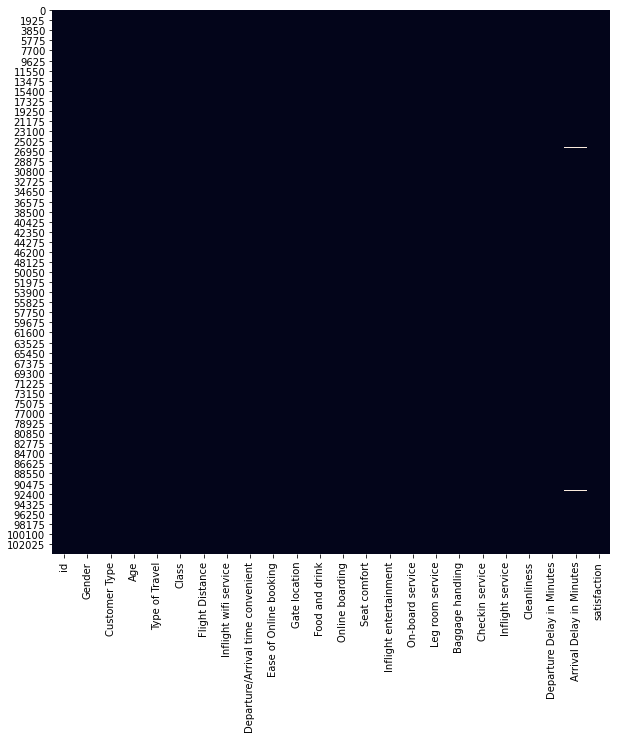

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.isnull(),cbar=False)
plt.show()

In [11]:
(df_train.isnull().sum()/len(df_train))*100 

id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes        

In [12]:
df_train.fillna(0,inplace=True)

In [13]:
df_train.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [14]:
df_test.fillna(0,inplace=True)
df_test.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [15]:
df_train.drop(['id'],axis=1, inplace=True)

In [16]:
df_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [17]:
df_test.drop(['id'],axis=1,inplace=True)

In [18]:
df_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [19]:
df_train['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

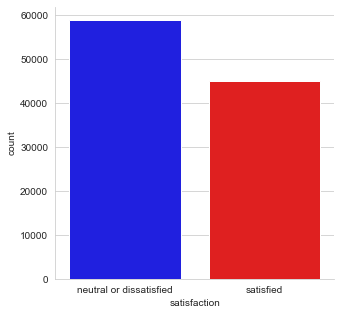

In [20]:
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
sns.countplot(df_train['satisfaction'],palette=['b','r'])
sns.despine()
plt.show()

In [21]:
np.round(df_train['satisfaction'].value_counts(normalize=1)*100, 2)

neutral or dissatisfied    56.67
satisfied                  43.33
Name: satisfaction, dtype: float64

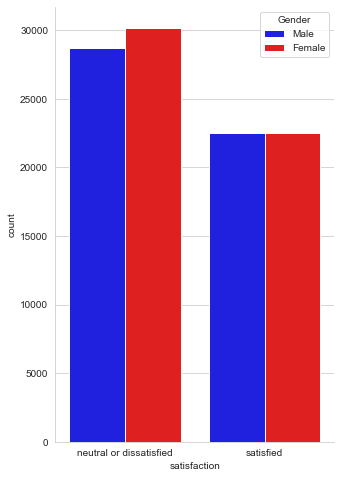

In [22]:
plt.figure(figsize=(5,8))
sns.countplot(df_train['satisfaction'],hue=df_train['Gender'],palette=['b','r'])
sns.despine()
plt.show()

In [23]:
l=['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

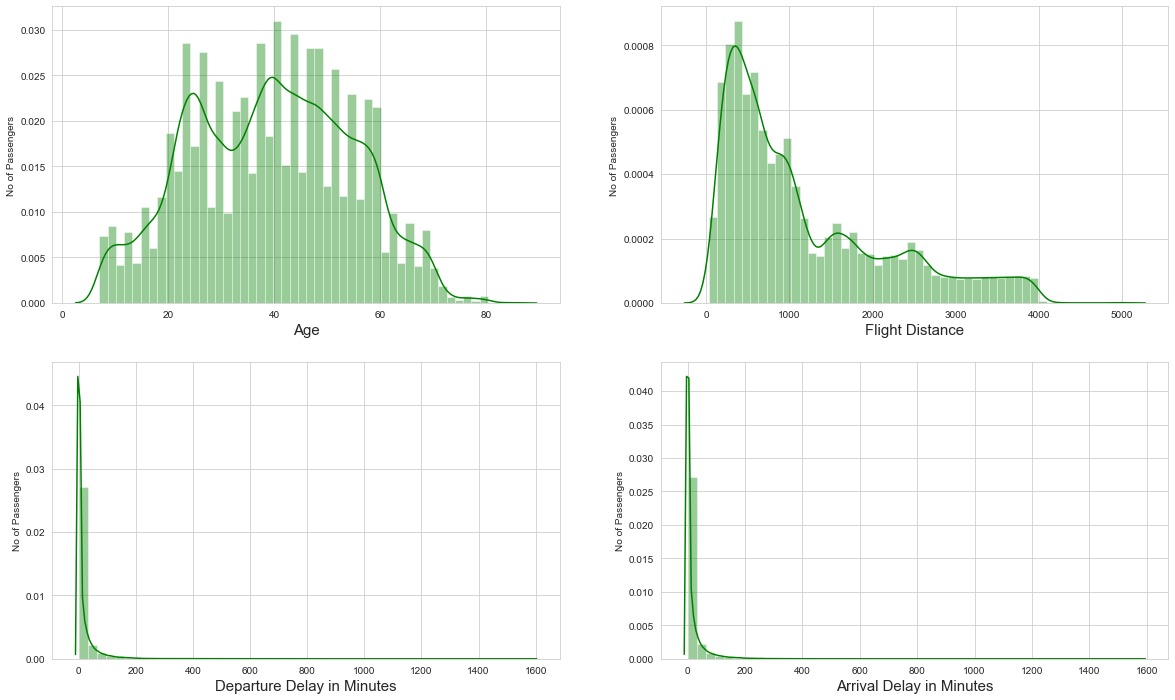

In [24]:
plt.figure(figsize=(20,12))
sns.despine()
# using for loop 
for i, j in enumerate(l): # It will add your list with index position
    plt.subplot(2,2,i+1)   # to create 4 plots ie using 2,2 means 4
    sns.distplot(df_train[j],norm_hist=True, color='g')  # creating distplot
    plt.xlabel(j, fontsize=15)     # increase the size 
    plt.ylabel('No of Passengers')    # ylabel
plt.show() 

In [25]:
for i,j in enumerate(l):
    print(j)

Age
Flight Distance
Departure Delay in Minutes
Arrival Delay in Minutes


In [26]:
df_train.head(2)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [27]:
df_train['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [28]:
df_train['Customer Type']=df_train['Customer Type'].map({'Loyal Customer':'Reliable','disloyal Customer':'Unreliable'})

In [29]:
# list of categorical variables :
l2 = ['Customer Type','Type of Travel','Class']

In [30]:
df_test['Customer Type']=df_test['Customer Type'].map({'Loyal Customer':'Reliable','disloyal Customer':'Unreliable'})

In [31]:
df_test.head(2)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Reliable,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Reliable,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied


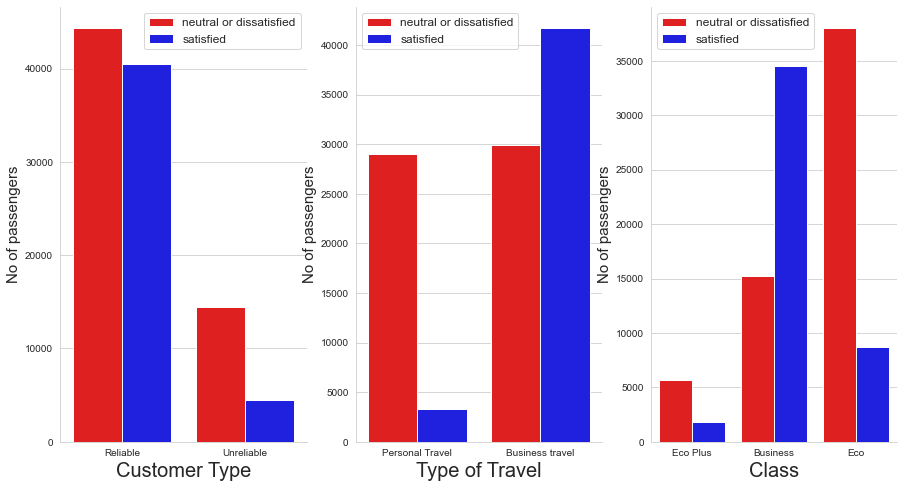

In [32]:
plt.figure(figsize=(15,8))
for i,j in enumerate(l2):
    plt.subplot(1,3, i+1)
    sns.countplot(df_train[j], hue=df_train['satisfaction'], palette=['r','b'])
    sns.despine()
    plt.xlabel(j,fontsize=20)
    plt.ylabel('No of passengers', fontsize=15)
    plt.legend(fontsize='large')
plt.show()

In [33]:
l3 = df_train.iloc[:,6:20].columns
l3

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'],
      dtype='object')

In [34]:
df_train['Inflight wifi service'].value_counts(normalize=True)

3    0.248961
2    0.248595
4    0.190503
1    0.171697
5    0.110381
0    0.029864
Name: Inflight wifi service, dtype: float64

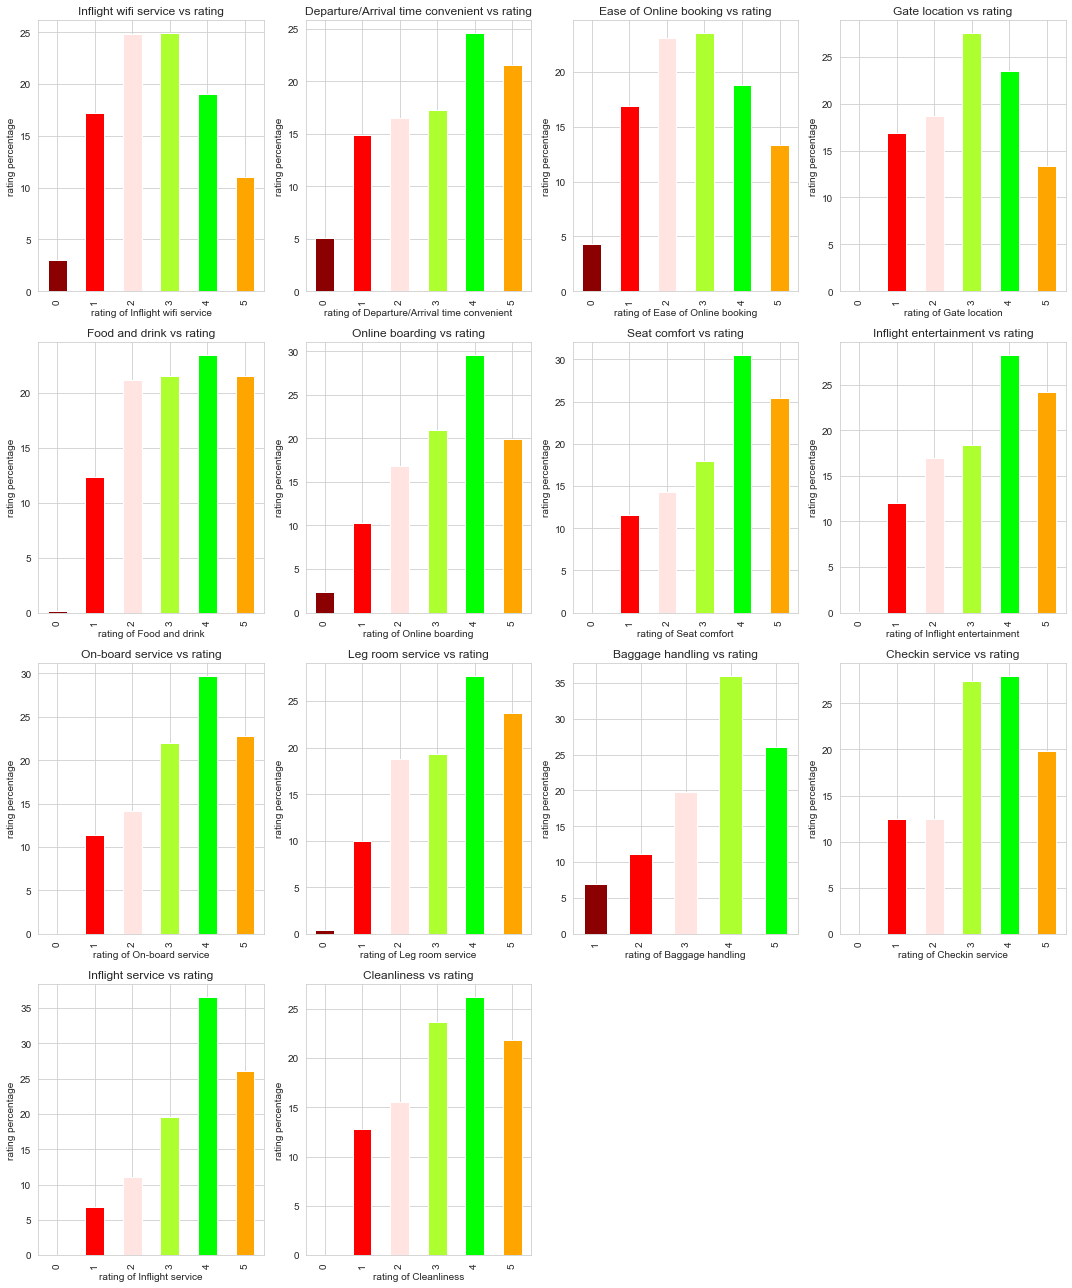

In [35]:
plt.figure(figsize=(15,18))
for i,j in enumerate(l3):
    plt.subplot(4,4,i+1)
    (df_train[j].value_counts(normalize=True)*100).sort_index(ascending=True).plot(kind='bar',
                                                                    color=['darkred','red','mistyrose','greenyellow','lime','orange'])
    plt.xlabel(f'rating of {l3[i]}')
    plt.ylabel('rating percentage')
    plt.title(f'{l3[i]} vs rating')
sns.despine
plt.tight_layout()
plt.show()

In [36]:
df_train['Inflight service'].value_counts()

4    37945
5    27116
3    20299
2    11457
1     7084
0        3
Name: Inflight service, dtype: int64

In [37]:
l1 =['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

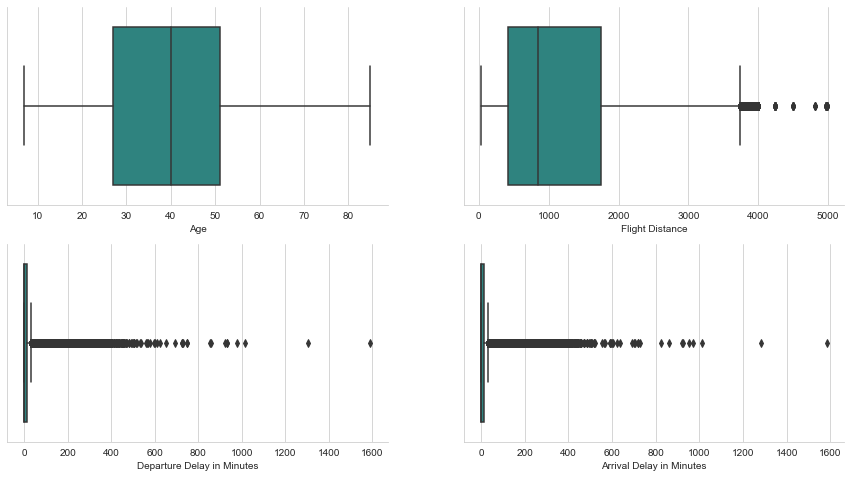

In [38]:
plt.figure(figsize=(15,8))
for i,j in enumerate(l1):
    plt.subplot(2,2,i+1)
    sns.boxplot(df_train[j],palette='viridis')
sns.despine()
plt.show()


In [39]:
skewed = df_train.skew()
skewed

Age                                 -0.004516
Flight Distance                      1.109466
Inflight wifi service                0.040408
Departure/Arrival time convenient   -0.334399
Ease of Online booking              -0.018294
Gate location                       -0.058889
Food and drink                      -0.151279
Online boarding                     -0.453852
Seat comfort                        -0.482775
Inflight entertainment              -0.365131
On-board service                    -0.420031
Leg room service                    -0.350231
Baggage handling                    -0.677040
Checkin service                     -0.364982
Inflight service                    -0.690314
Cleanliness                         -0.300074
Departure Delay in Minutes           6.733980
Arrival Delay in Minutes             6.605288
dtype: float64

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Density'>

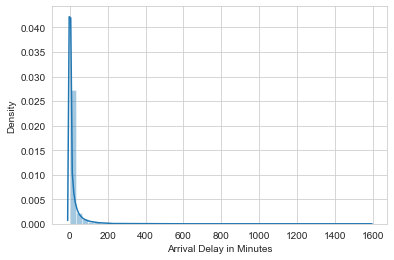

In [40]:
sns.distplot(df_train['Arrival Delay in Minutes'])

<AxesSubplot:xlabel='Cleanliness', ylabel='Density'>

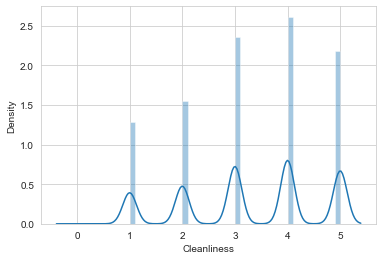

In [41]:
sns.distplot(df_train['Cleanliness'])

<AxesSubplot:>

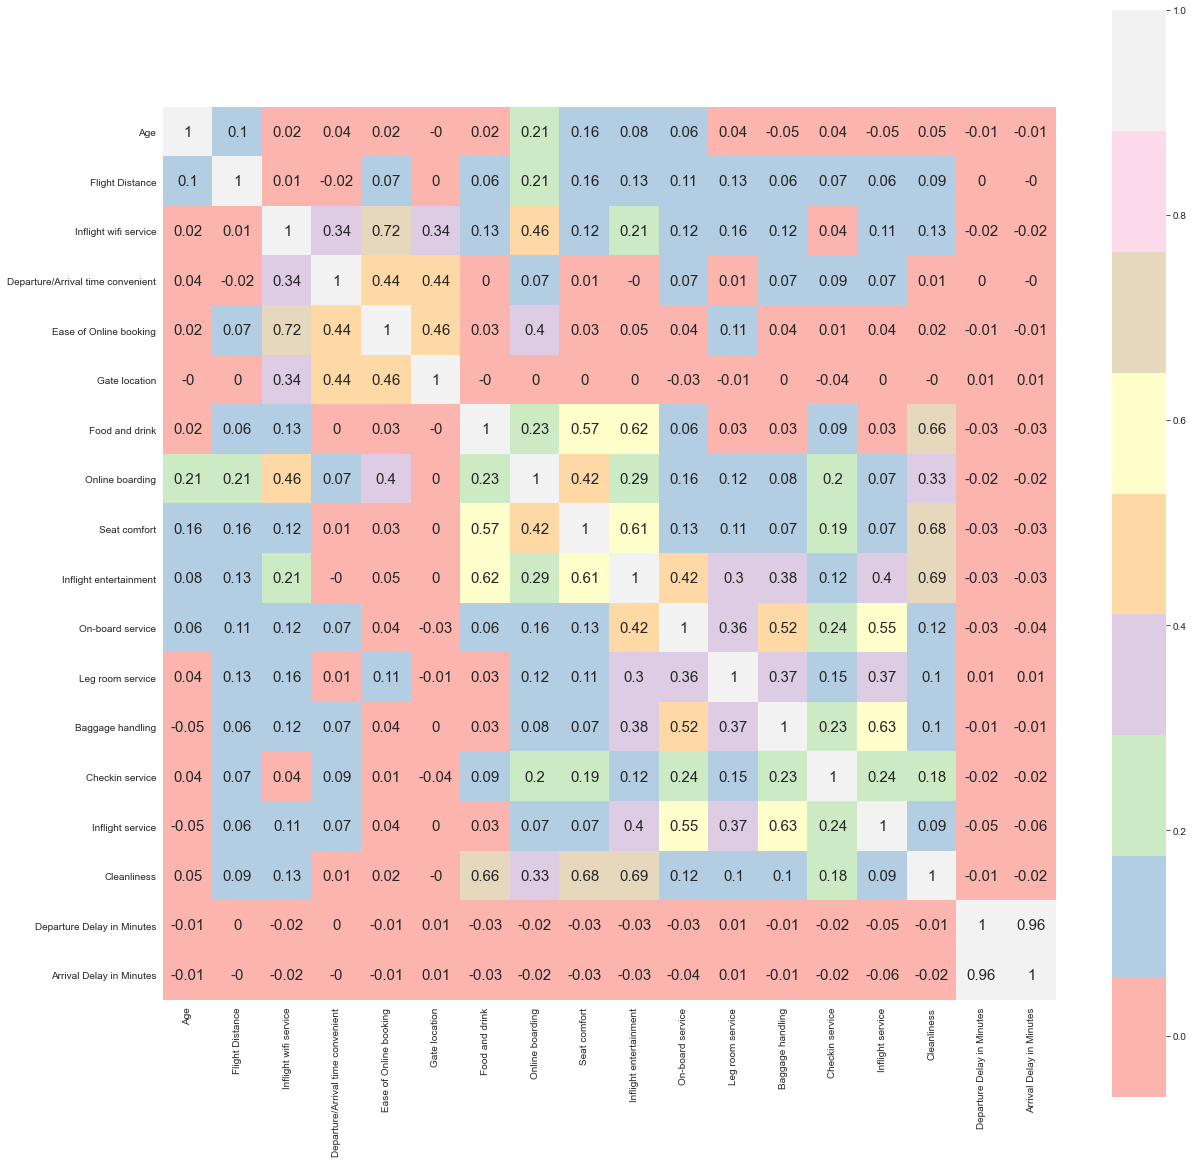

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr().round(2),annot=True,cmap='Pastel1', square=True, annot_kws={'size':15})

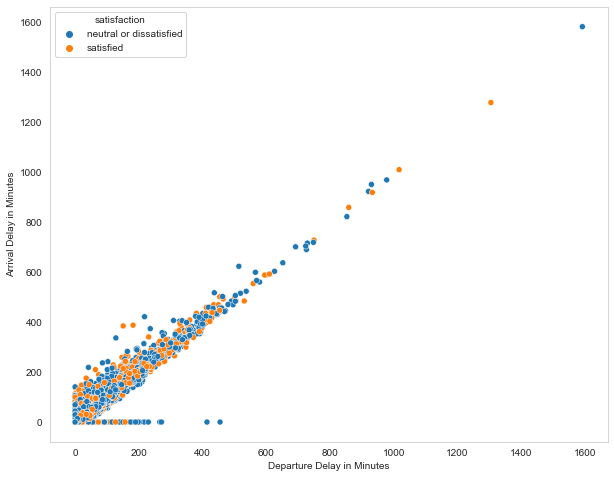

In [43]:
plt.figure(figsize=(10,8))
sns.scatterplot(df_train['Departure Delay in Minutes'],df_train['Arrival Delay in Minutes'],
               hue=df_train['satisfaction'])
plt.grid(False)
plt.show()

In [44]:
l5 = ['Customer Type', 'Type of Travel', 'Class','Gender']

In [45]:
df_train['Customer Type'].value_counts()

Reliable      84923
Unreliable    18981
Name: Customer Type, dtype: int64

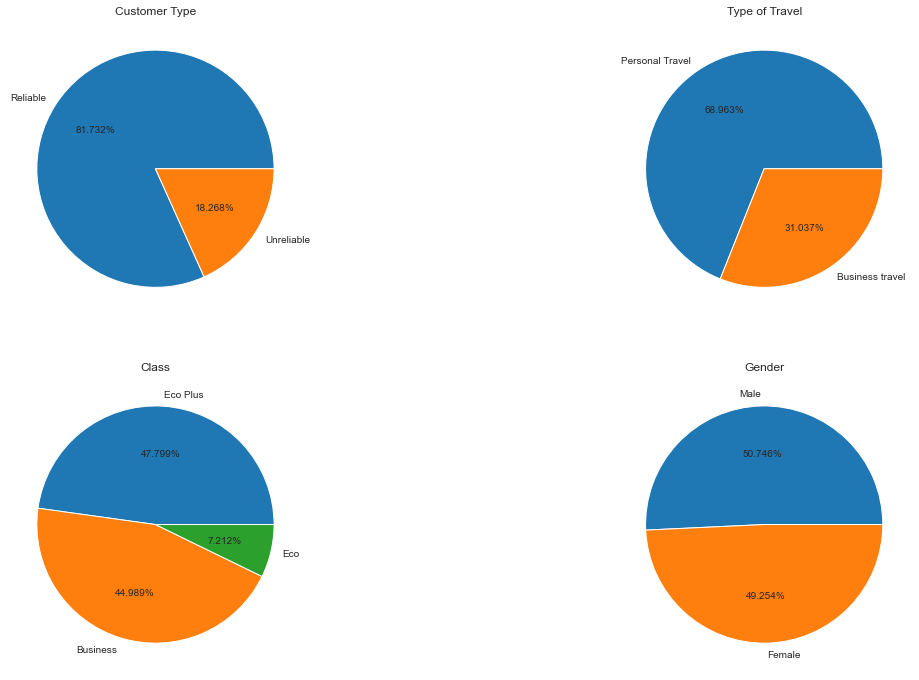

In [46]:
plt.figure(figsize=(20,12))
sns.despine()
for i,j in enumerate(l5):
    plt.subplot(2,2,i+1)
    plt.pie(df_train[j].value_counts(),labels=df_train[j].unique(),autopct='%1.3f%%')
    plt.title(j)
plt.show()

In [47]:
df_test['Age'].describe()

count    25976.000000
mean        39.620958
std         15.135685
min          7.000000
25%         27.000000
50%         40.000000
75%         51.000000
max         85.000000
Name: Age, dtype: float64

In [48]:
df_train['Age'] = pd.cut(x = df_train['Age'], bins=[7,16,25,55,85], labels=['Kids','youth','adult','elder'])

In [49]:
df_test['Age']=pd.cut(x=df_test['Age'],bins=[7,16,25,55,85],labels=['Kids','youth','adult','elder'])

In [50]:
pd.set_option('display.max_columns',None)
df_train.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Reliable,Kids,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,Unreliable,youth,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Reliable,adult,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Reliable,youth,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Reliable,elder,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [51]:
df_train = pd.get_dummies(df_train,columns=['Gender','Customer Type','Age','Type of Travel'],drop_first=True)

In [52]:
df_test = pd.get_dummies(df_test,columns=['Gender','Customer Type','Age','Type of Travel'],drop_first=True)

In [53]:
df_test.head()

,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_Unreliable,Age_youth,Age_adult,Age_elder,Type of Travel_Personal Travel
0,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied,0,0,0,1,0,0
1,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied,0,0,0,1,0,0
2,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied,1,1,1,0,0,0
3,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied,1,0,0,1,0,0
4,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied,0,0,0,1,0,0


In [54]:
df_train['satisfaction'] = df_train['satisfaction'].map({'satisfied':0, 'neutral or dissatisfied':1})

In [55]:
df_test['satisfaction']=df_test['satisfaction'].map({'satisfied':0,'neutral or dissatisfied':1})

In [56]:
df_train.head()

,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_Unreliable,Age_youth,Age_adult,Age_elder,Type of Travel_Personal Travel
0,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,1,1,0,0,0,0,1
1,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,1,1,1,1,0,0,0
2,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,0,0,0,0,1,0,0
3,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,1,0,0,1,0,0,0
4,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,0,1,0,0,0,1,0


In [57]:
df_train['Class']=df_train['Class'].map({'Eco':0,'Eco Plus':1,'Business':2})

In [58]:
df_test['Class']=df_test['Class'].map({'Eco':0,'Eco Plus':1,'Business':2})

In [59]:
df_train.head(2)

,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_Unreliable,Age_youth,Age_adult,Age_elder,Type of Travel_Personal Travel
0,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,1,1,0,0,0,0,1
1,2,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,1,1,1,1,0,0,0


In [60]:
df_test.head(2)

,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_Unreliable,Age_youth,Age_adult,Age_elder,Type of Travel_Personal Travel
0,0,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,0,0,0,0,1,0,0
1,2,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,0,0,0,0,1,0,0


In [61]:
df_train.shape

(103904, 25)

In [62]:
df_test.shape

(25976, 25)

In [63]:
# splitting our data
x_train = df_train.drop(['satisfaction'],axis=1)
y_train = df_train['satisfaction']

In [64]:
print(x_train.shape), (y_train.shape)

(103904, 24)


(None, (103904,))

In [65]:
x_test = df_test.drop(['satisfaction'],axis=1)
y_test = df_test['satisfaction']

In [66]:
print(x_test.shape), (y_test.shape)

(25976, 24)


(None, (25976,))

In [67]:
from sklearn.linear_model import LogisticRegression
model =  LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [69]:
accuracy_score(y_test,model.predict(x_test))

0.8089775177086541

In [70]:
accuracy_score(y_train,model.predict(x_train))

0.8091507545426547

In [71]:
## we add the constant in our X_train
Xc= sm.add_constant(x_train)

In [72]:
## we add the constant in our X_test
Xc_test= sm.add_constant(x_test)

In [73]:
## fit the model in our data 
logistic_classification = sm.Logit(y_train,Xc).fit()
##summary gives the clear explanation about the model
logistic_classification.summary()

Optimization terminated successfully.
         Current function value: 0.333519
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:               103904
Model:                          Logit   Df Residuals:                   103879
Method:                           MLE   Df Model:                           24
Date:                Sun, 04 Sep 2022   Pseudo R-squ.:                  0.5126
Time:                        13:03:49   Log-Likelihood:                -34654.
converged:                       True   LL-Null:                       -71094.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 7.0862      0.079     89.778      0.000       6.931       7.241
Class                                -0.3733      0.013    -28.958      0.000      -0.399      -0.348
Flight Distance                   -1.418e-06   1.12e-05     -0.127      0.899   -2.33e-05    2.05e-05
Inflight wifi service                -0.3875      0.011    -33.900      0.000      -0.410      -0.365
Departure/Arrival time convenient     0.1200      0.008     14.558      0.000       0.104       0.136
Ease of Online booking                0.1443      0.011     12.721      0.000       0.122       0.166
Gate location                        -0.0289      0.009     -3.152      0.002      -0.047      -0.011
Food and drink                        0.0266      0.011      2.497      0.013       0.006       0.047
Online boarding                      -0.6147      0.010    -60.349      0.000      -0.635      -0.595
Seat comfort                         -0.0714      0.011     -6.407      0.000      -0.093      -0.050
Inflight entertainment               -0.0617      0.014     -4.330      0.000      -0.090      -0.034
On-board service                     -0.3054      0.010    -29.998      0.000      -0.325      -0.285
Leg room service                     -0.2562      0.009    -30.015      0.000      -0.273      -0.239
Baggage handling                     -0.1356      0.011    -11.847      0.000      -0.158      -0.113
Checkin service                      -0.3265      0.009    -38.139      0.000      -0.343      -0.310
Inflight service                     -0.1211      0.012    -10.053      0.000      -0.145      -0.098
Cleanliness                          -0.2212      0.012    -18.342      0.000      -0.245      -0.198
Departure Delay in Minutes           -0.0042      0.001     -4.567      0.000      -0.006      -0.002
Arrival Delay in Minutes              0.0089      0.001      9.818      0.000       0.007       0.011
Gender_Male                          -0.0471      0.019     -2.417      0.016      -0.085      -0.009
Customer Type_Unreliable              2.0627      0.030     68.960      0.000       2.004       2.121
Age_youth                            -0.5015      0.050    -10.041      0.000      -0.599      -0.404
Age_adult                            -0.0520      0.046     -1.135      0.256      -0.142       0.038
Age_elder                             0.1774      0.050      3.517      0.000       0.079       0.276
Type of Travel_Personal Travel        2.7041      0.032     85.339      0.000       2.642       2.766
=====================================================================================================
"""

In [74]:
## 'y_pred_prob' be the predicted values of y
y_pred_proba=logistic_classification.predict(Xc_test)
y_pred_proba

0        0.064462
1        0.133780
2        0.965566
3        0.694823
4        0.936107
           ...   
25971    0.704103
25972    0.017878
25973    0.960569
25974    0.124249
25975    0.998839
Length: 25976, dtype: float64

# convert probabilities to 0 and 1 using 'if_else'
y_pred= [0 if i<0.5 else 1 for i in y_pred_proba]
y_pred

In [75]:
y_pred= [0 if i<0.5 else 1 for i in y_pred_proba] 
y_pred

[0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,


In [76]:
# calculate the accuracy
accuracy_logistic=accuracy_score(y_test,y_pred)
# print the accuracy
accuracy_logistic

0.8712657838004312

In [77]:
confusion_matrix(y_test,y_pred)

array([[ 9505,  1898],
       [ 1446, 13127]], dtype=int64)

In [78]:
y_test[:5]

0    0
1    0
2    1
3    0
4    0
Name: satisfaction, dtype: int64

In [79]:
model.predict(x_test)[:5]

array([0, 0, 1, 0, 1], dtype=int64)

In [80]:
confusion_matrix_logistic= confusion_matrix(y_test,model.predict(x_test))

In [81]:
confusion_matrix(y_train,model.predict(x_train))

array([[38243,  6782],
       [13048, 45831]], dtype=int64)

In [82]:
confusion_matrix_logistic

array([[ 9716,  1687],
       [ 3275, 11298]], dtype=int64)

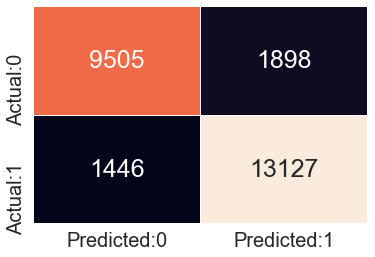

In [83]:
cm = confusion_matrix(y_test, y_pred)

cm_confusion = pd.DataFrame(data=cm, columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

sns.heatmap(cm_confusion,annot=True,fmt='d',cbar= False,linewidths=0.1,annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

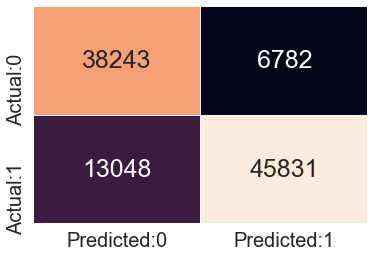

In [84]:
cm1 = confusion_matrix(y_train, model.predict(x_train))

cm_confusion = pd.DataFrame(data=cm1, columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

sns.heatmap(cm_confusion,annot=True,fmt='d',cbar= False,linewidths=0.1,annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     11403
           1       0.87      0.90      0.89     14573

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



In [86]:
from sklearn.metrics import roc_auc_score,roc_curve

In [87]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
fpr,tpr,threshold

(array([0.        , 0.        , 0.        , ..., 0.95106551, 0.95106551,
        1.        ]),
 array([0.00000000e+00, 6.86200508e-05, 5.48960406e-04, ...,
        9.99931380e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99997391, 0.99997391, 0.99921704, ..., 0.01653485, 0.01652859,
        0.00393211]))

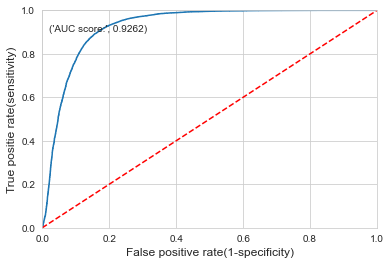

In [88]:
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.02,y=0.9,s=('AUC score:',round(metrics.roc_auc_score(y_test,y_pred_proba),4)))
plt.xlabel('False positive rate(1-specificity)',fontsize=12)
plt.ylabel('True positie rate(sensitivity)',fontsize=12)
plt.show()

### Naive Baye's Algorithm

In [89]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [90]:
y_pred=gb.predict(x_test)

In [91]:
accuracy_score(y_test,gb.predict(x_test))

0.8592931937172775

In [92]:
accuracy_score(y_train,gb.predict(x_train))

0.8629600400369571

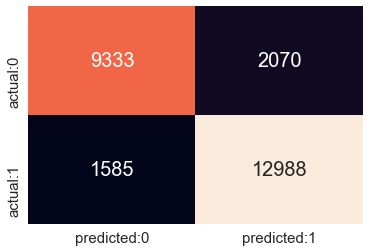

In [93]:
cm2=confusion_matrix(y_test,y_pred)

confusion_matrix1=pd.DataFrame(data=cm2,columns=['predicted:0','predicted:1'],index=['actual:0','actual:1'])

sns.heatmap(confusion_matrix1,annot=True,fmt='d',cbar=False,annot_kws={'size':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

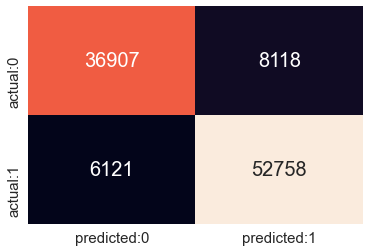

In [94]:
cm3=confusion_matrix(y_train,gb.predict(x_train))

confusion_matrix1=pd.DataFrame(data=cm3,columns=['predicted:0','predicted:1'],index=['actual:0','actual:1'])

sns.heatmap(confusion_matrix1,annot=True,fmt='d',cbar=False,annot_kws={'size':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84     11403
           1       0.86      0.89      0.88     14573

    accuracy                           0.86     25976
   macro avg       0.86      0.85      0.86     25976
weighted avg       0.86      0.86      0.86     25976



### Random Forest classifier

In [96]:
from sklearn.ensemble import RandomForestClassifier
rd = RandomForestClassifier()
rd.fit(x_train,y_train)

RandomForestClassifier()

In [97]:
accuracy_score(y_test,rd.predict(x_test))

0.9616569140745304

In [98]:
accuracy_score(y_train,rd.predict(x_train))

0.9999903757314444

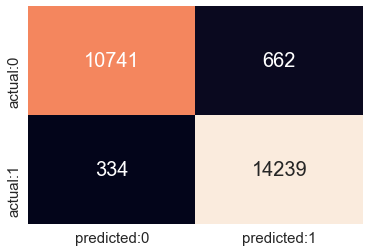

In [99]:
cm4=confusion_matrix(y_test,rd.predict(x_test))

confusion_matrix2=pd.DataFrame(data=cm4,columns=['predicted:0','predicted:1'],index=['actual:0','actual:1'])

sns.heatmap(confusion_matrix2,annot=True,fmt='d',cbar=False,annot_kws={'size':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

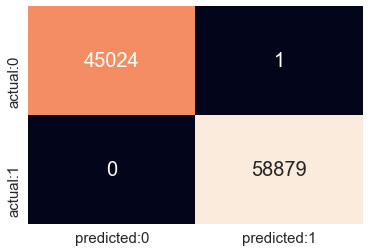

In [100]:
cm5=confusion_matrix(y_train,rd.predict(x_train))

confusion_matrix2=pd.DataFrame(data=cm5,columns=['predicted:0','predicted:1'],index=['actual:0','actual:1'])

sns.heatmap(confusion_matrix2,annot=True,fmt='d',cbar=False,annot_kws={'size':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### KNN Model

In [101]:
knn=KNeighborsClassifier()

In [102]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [103]:
accuracy_score(y_test,knn.predict(x_test))

0.7863797351401294

In [104]:
accuracy_score(y_train,knn.predict(x_train))

0.8595819217739452

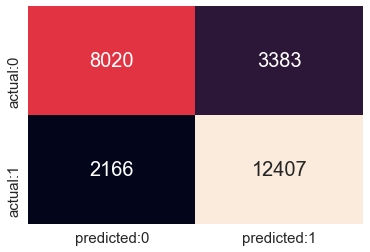

In [105]:
cm6=confusion_matrix(y_test,knn.predict(x_test))

confusion_matrix3=pd.DataFrame(data=cm6,columns=['predicted:0','predicted:1'],index=['actual:0','actual:1'])

sns.heatmap(confusion_matrix3,annot=True,fmt='d',cbar=False,annot_kws={'size':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Decision Tree

In [106]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [107]:
accuracy_score(y_test,dt.predict(x_test))

0.9450646750846936

In [108]:
accuracy_score(y_train,dt.predict(x_train))

1.0

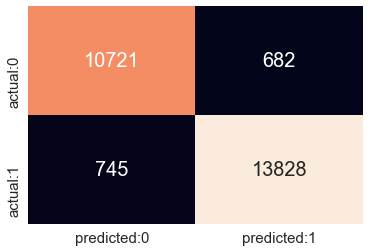

In [109]:
cm7=confusion_matrix(y_test,dt.predict(x_test))

confusion_matrix4=pd.DataFrame(data=cm7,columns=['predicted:0','predicted:1'],index=['actual:0','actual:1'])

sns.heatmap(confusion_matrix4,annot=True,fmt='d',cbar=False,annot_kws={'size':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

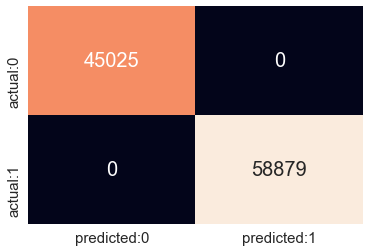

In [110]:
cm8=confusion_matrix(y_train,dt.predict(x_train))

confusion_matrix5=pd.DataFrame(data=cm8,columns=['predicted:0','predicted:1'],index=['actual:0','actual:1'])

sns.heatmap(confusion_matrix5,annot=True,fmt='d',cbar=False,annot_kws={'size':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# Adaboost Model

In [111]:
ada=AdaBoostClassifier()

In [112]:
ada_model=ada.fit(x_train,y_train)

In [113]:
y_pred_t=ada_model.predict(x_train)

In [114]:
accuracy_adat=accuracy_score(y_train,y_pred_t)
accuracy_adat

0.9279142285186326

In [119]:
print(classification_report(y_train,y_pred_t))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     45025
           1       0.93      0.94      0.94     58879

    accuracy                           0.93    103904
   macro avg       0.93      0.93      0.93    103904
weighted avg       0.93      0.93      0.93    103904



In [120]:
y_pred=ada_model.predict(x_test)

In [121]:
accuracy_ada=accuracy_score(y_test,y_pred)
accuracy_ada

0.9276255004619649

In [122]:
confusion_matrix_ada=confusion_matrix(y_test,y_pred)
confusion_matrix_ada

array([[10384,  1019],
       [  861, 13712]], dtype=int64)

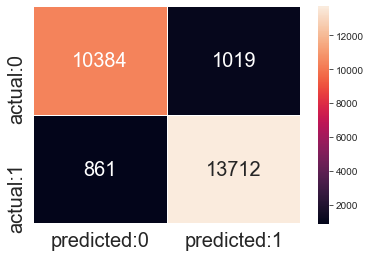

In [123]:
cm9=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm9,columns=['predicted:0','predicted:1'],index=['actual:0','actual:1'])
sns.heatmap(conf_matrix,annot=True,annot_kws={'size':20},fmt='d',cbar='false',linewidths=0.1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [125]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     11403
           1       0.93      0.94      0.94     14573

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



### Gradient boosting model